# Linear Regression



#### Best fit line 
$ \large y = m \times x + c $

where **m** is slope, **c** is intercept

#### cost function (find sum of minimal errors)
$$\large \frac {1} {2 \times m} \times \sum_{n=1}^m (\hat{y} - y)^2$$

where $\large \hat{y}$ is the points of the best fit line and $\large y$ is the real points

To find the best fit line with the minimum sum of errors just by this equation will take a lot of time and processing power by selecting and computing a lot of lines in order to find the line with minimal sum of errors. To avoid it we use Gradient Descent.

Based on some initial **m** value, we got some point on the gragient descent. In order to find the global minima we have to move **m** value  downwards towards the global minima point. In order to do that we have to alter an **m** value by applying *Convergence Theorem*

We should subtract from m the derivative of m with respect to m minus the learning rate (alpha):

$\large m = m - (\frac{\partial{m}}{dm})\times \alpha$

Where the derivative is a slope.

First we have to find if the slope is positive or negative. If the right side of the slope is pointing downwards, that means it's a negative slope. If it's pointing upwards the slope is positive.

Ex.1:

***For example, if our global minima at point 1 (where the slope is parallel to x axis)***

Suppose our initial **m** is 0.5, learning rate is 0.001

$m = 0.5 - (-(negative slope)) \times 0.001$

$m = 0.5 + positive value \times 0.001$

So, it means that our **m** value should increase and come closer to 1.

Ex.2:

Suppose our initial **m** is 2, learning rate is 0.001

$m = 2 - (positive slope) \times 0.001$

$m = 2 - positive value \times 0.001$

So, it means that our **m** value should descrease and come closer to 1.

Since our learning rate is small, there will be many small steps towards global minima.

If we take a larger learning rate, the steps will be larger and **m** value may never reach global minima even after many iterations.
That's why learning rate is usually selected as very small value.

Once we reach the point of global minima, our gradient descent slope should be zero, and when the gradient descent slope is zero, at that time **m** value will be the slope of the best fit line. And it is where we should stop training the model.

**NOTE**

When we have one independent feature our gradient descent diagram will be a parabola on a 2d plane,
if we have multiple independent features, our gradient descent will look like 3d, 4d etc diagram, and each feature will try to move toward the global minima.

### Example of best fit line with the points on 2d plane

In [6]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

c:\users\tigju\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


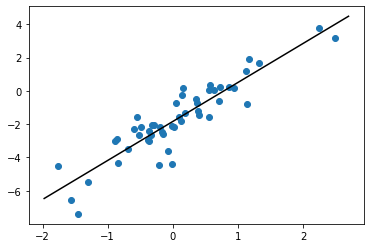

In [8]:
N = 50
x = np.random.randn(N, 1)
y = x*2.2 + np.random.randn(N, 1)-1.8
# plt.axhline(0, color='r', zorder=-1)
# plt.axvline(0, color='r', zorder=-1)
plt.scatter(x, y)

# fit least-squares with an intercept
w = np.linalg.lstsq(np.hstack((x, np.ones((N,1)))), y)[0]
xx = np.linspace(*plt.gca().get_xlim()).T

plt.xlabel
# plot best-fit line
plt.plot(xx, w[0]*xx + w[1], '-k')
plt.show()

## Interview questions


#### 1. What Are the Basic Assumption?(favourite)
There are four assumptions associated with a linear regression model:

 - Linearity: The relationship between X and the mean of Y is linear.
 - Homoscedasticity: The variance of residual is the same for any value of X.
 - Independence: Observations are independent of each other.
 - Normality: For any fixed value of X, Y is normally distributed.
 
#### 2. Advantages
 - Linear regression performs exceptionally well for linearly separable data
 - Easy to implement and train the model
 - It can handle overfitting using dimensionlity reduction techniques and cross validation and regularization

#### 3. Disadvantages
 - Sometimes Lot of Feature Engineering Is required
 - If the independent features are correlated it may affect performance
 - It is often quite prone to noise and overfitting

#### 4. Whether Feature Scaling is required?
 - Yes

#### 5. Impact of Missing Values?
 - It is sensitive to missing values

#### 6. Impact of outliers?
linear regression needs the relationship between the independent and dependent variables to be linear. It is also important to check for outliers since linear regression is sensitive to outlier effects.

### Example taken from sklearn

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


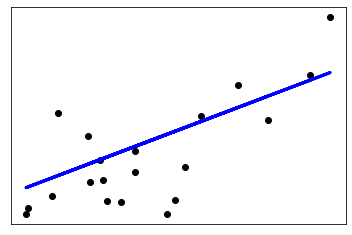

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()